# Decison Trees

In [1]:
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"  # Replace with the actual path to the GraphViz bin folder

In [2]:
# pip install pydotplus
# pip install graphviz

In [3]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

import warnings
warnings.filterwarnings("ignore")

In [4]:
input_file = r"D:\Machine Learning\Decision Tree\Datasets\PastHires.csv"
df = pd.read_csv(input_file)

In [5]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [6]:
df.shape

(13, 7)

In [7]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Years Experience    13 non-null     int64 
 1   Employed?           13 non-null     object
 2   Previous employers  13 non-null     int64 
 3   Level of Education  13 non-null     object
 4   Top-tier school     13 non-null     object
 5   Interned            13 non-null     object
 6   Hired               13 non-null     object
dtypes: int64(2), object(5)
memory usage: 860.0+ bytes


In [9]:
df.isnull().sum()

Years Experience      0
Employed?             0
Previous employers    0
Level of Education    0
Top-tier school       0
Interned              0
Hired                 0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
for i in df.columns:
    
    print(df[i].unique())

[10  0  7  2 20  5  3 15  1  4]
['Y' 'N']
[4 0 6 1 2 5]
['BS' 'MS' 'PhD']
['N' 'Y']
['N' 'Y']
['Y' 'N']


In [12]:
d = {'Y': 1, 'N': 0}
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,Y
1,0,0,0,0,1,1,Y
2,7,0,6,0,0,0,N
3,2,1,1,1,1,0,Y
4,20,0,2,2,1,0,N
5,0,0,0,2,1,1,Y
6,5,1,2,1,0,1,Y
7,3,0,1,0,0,1,Y
8,15,1,5,0,0,0,Y
9,0,0,0,0,0,0,N


In [13]:
#df['Employed'].replace({'Y': 1, 'N': 0}, inplace=True)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Years Experience,13.0,5.153846,6.348834,0.0,0.0,3.0,7.0,20.0
Employed?,13.0,0.384615,0.506370,0.0,0.0,0.0,1.0,1.0
Previous employers,13.0,1.769231,2.006400,0.0,0.0,1.0,2.0,6.0
Level of Education,13.0,0.769231,0.926809,0.0,0.0,0.0,2.0,2.0
Top-tier school,13.0,0.461538,0.518875,0.0,0.0,0.0,1.0,1.0
Interned,13.0,0.384615,0.506370,0.0,0.0,0.0,1.0,1.0


In [15]:
num = df.select_dtypes(exclude=['object']).columns.tolist()
print(num)

['Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned']


Years Experience


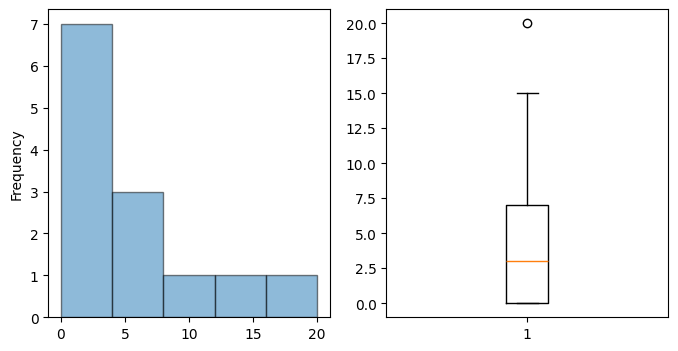

Employed?


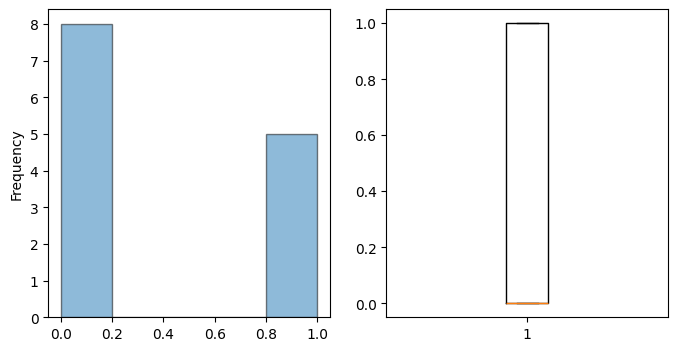

Previous employers


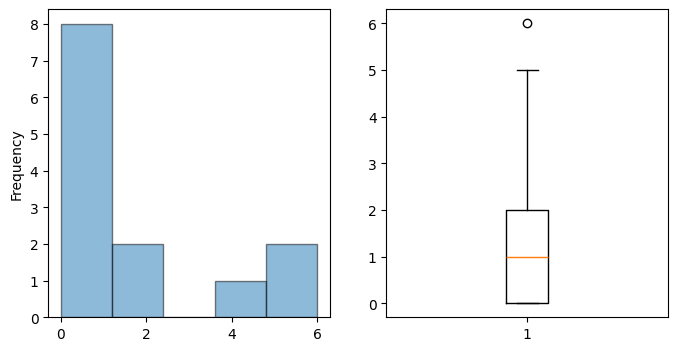

Level of Education


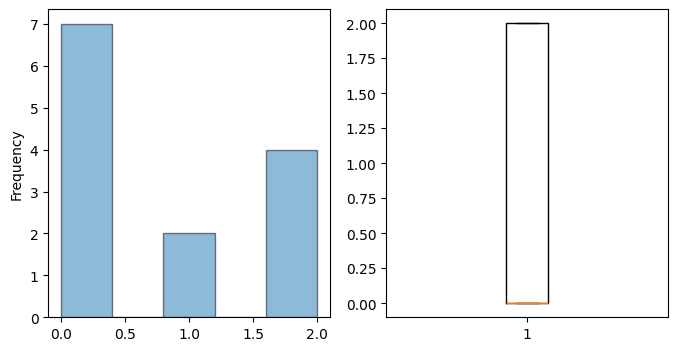

Top-tier school


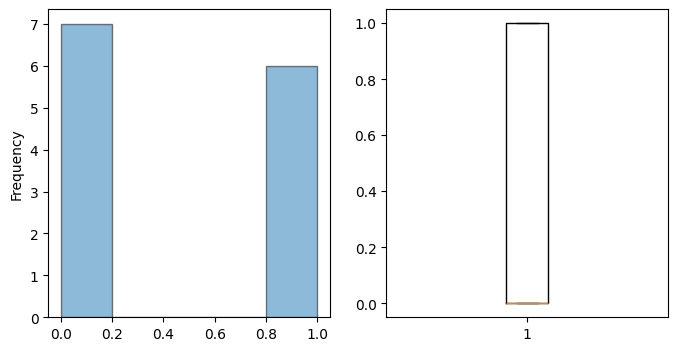

Interned


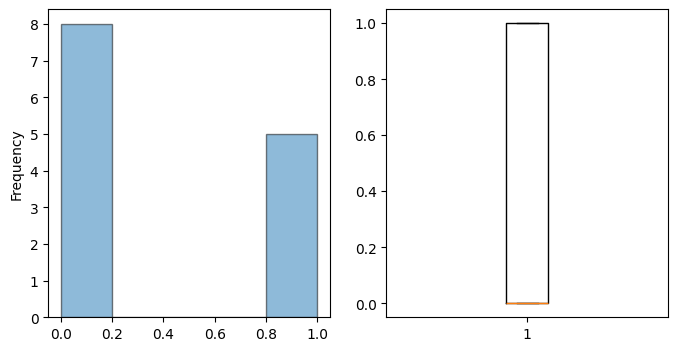

In [16]:
for col in num:
    print(col)

    plt.figure(figsize=(8, 4))
    plt.subplot(1,2,1)
    df[col].hist(bins=5, alpha=0.5, grid= False, edgecolor='black')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.boxplot(df[col])
    plt.show()

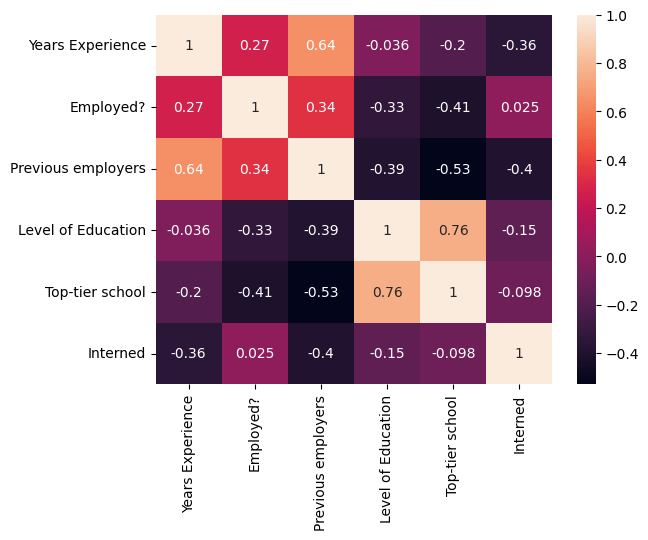

In [17]:
corr = df[num].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [18]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

In [19]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [20]:
y = df["Hired"]
X = df[features]

In [21]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Fit the decision tree model
model = DecisionTreeClassifier(criterion='gini')#criterion='gini'
model.fit(X_train, y_train)
model

DecisionTreeClassifier()

In [23]:
import math

# Function to calculate entropy
def entropy(column):
    counts = column.value_counts()
    probabilities = counts / len(column)
    return -sum(probabilities * probabilities.apply(math.log2))

# Function to calculate conditional entropy
def conditional_entropy(data, feature, target):
    feature_values = data[feature].unique()  # Corrected: use .unique() on the series
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])
    return weighted_entropy

# Function to calculate information gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    feature_conditional_entropy = conditional_entropy(data, feature, target)
    return total_entropy - feature_conditional_entropy


# Calculate information gain for each feature

for feature in features:
    ig = information_gain(df,feature,'Hired')
    print(f"Information Gain for {feature}: {ig}")

Information Gain for Years Experience: 0.6408676019243735
Information Gain for Employed?: 0.2751070248348759
Information Gain for Previous employers: 0.23739740978310186
Information Gain for Level of Education: 0.11804210329899778
Information Gain for Top-tier school: 0.0019055645046179848
Information Gain for Interned: 0.2751070248348759


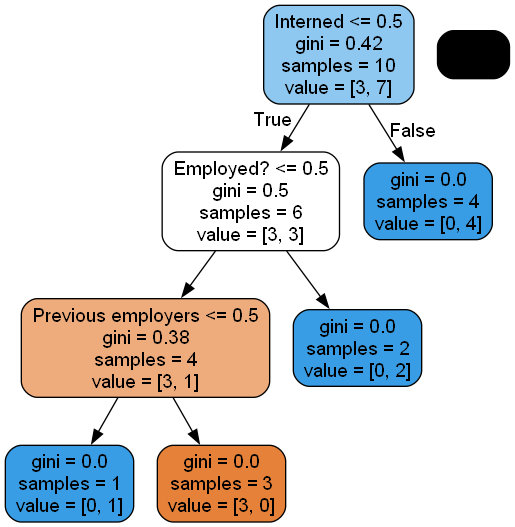

In [32]:
# Export the tree to DOT format
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X_train.columns,  
                           rounded=True, proportion=False, 
                           precision=2, filled=True)

# Convert DOT data to a graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Display the graph
Image(graph.create_png())

In [25]:
y_pred = model.predict(X_test)
y_pred

array(['Y', 'Y', 'Y'], dtype=object)

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) 
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           N       0.00      0.00      0.00         1
           Y       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Confusion Matrix:
 [[0 1]
 [0 2]]


In [27]:
X_train

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
8,15,1,5,0,0,0
5,0,0,0,2,1,1
2,7,0,6,0,0,0
1,0,0,0,0,1,1
12,0,0,0,2,1,0
4,20,0,2,2,1,0
7,3,0,1,0,0,1
10,1,0,1,2,1,0
3,2,1,1,1,1,0
6,5,1,2,1,0,1


In [28]:
new = [[30,1,5,2,1,1]]
y_pred = model.predict(new)
y_pred[0]

'Y'

In [29]:
new = [[25,0,1,2,1,1]]
y_pred = model.predict(new)
y_pred[0]

'Y'

**Classification Report:**

**Precision:** Precision measures how many of the predicted positive instances are actually positive. It is calculated as:
Precision=True Positives (TP) / False Positives(FP) + True Positives (TP)​

**Recall (Sensitivity):** Recall (also known as sensitivity or true positive rate) measures how many of the actual positive instances were correctly predicted. It is calculated as:
Recall=True Positives (TP) / False Negatives(FN) + True Positives (TP)​

**F1-Score:** The F1-score is the harmonic mean of precision and recall. It balances precision and recall, especially when dealing with imbalanced datasets. It is calculated as:
F1-Score=2 * Precision*Recall / Precision + Recall​

**Support:** The number of instances (samples) in each class.

**Weighted Average:**
- The weighted average of precision, recall, and F1-score accounts for class imbalance by considering the class distribution.
- It is calculated by taking the average of precision, recall, and F1-score, weighted by the number of instances in each class.

**Confusion Matrix:**
A confusion matrix summarizes the performance of a classification model by comparing its predicted labels to the true labels.
It is a 2x2 matrix with the following components:
- True Positives (TP): Instances correctly predicted as positive.
- True Negatives (TN): Instances correctly predicted as negative.
- False Positives (FP): Instances predicted as positive but actually negative.
- False Negatives (FN): Instances predicted as negative but actually positive.

The matrix helps us understand the model’s accuracy and errors

<pre></code>
    Actual       Predicted
            Not Dog       Dog
Not Dog         TN        FP
Dog             FN        TP</code></pre>

**Metrics based on the confusion matrix:**
- Accuracy: The ratio of total correct predictions to the total instances.
- Precision, Recall, and F1-Score: Derived from TP, FP, and FN.
- These metrics provide insights into the model’s performance beyond basic accuracy.


[[0.         0.33333333]
 [0.         0.66666667]]


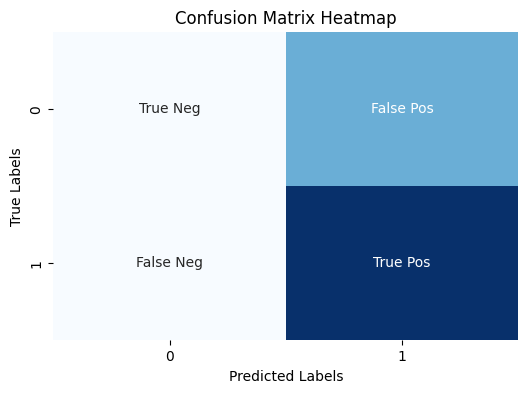

In [30]:
# Calculate the total number of instances
total_instances = np.sum(conf_matrix)

# Create a heatmap with labels and percentages
labels = np.array([['True Neg', 'False Pos'], ['False Neg', 'True Pos']])
percentages = conf_matrix / total_instances
print(percentages)

plt.figure(figsize=(6, 4))
sns.heatmap(percentages, annot=labels, fmt='', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

Train Accuracy: The model achieved a perfect accuracy of 100% on the training data, which suggests that it was able to perfectly fit the training data.

Test Accuracy: The accuracy on the test data is approximately 66.67%. While this is not as high as the training accuracy, it still indicates that the model is performing reasonably well on unseen data.

Classification Report:

- class 0 = Not Hired
- class 1 = Hired

- Precision: Precision for class 0 is 0, which means that out of the instances predicted as class 0, none were actually class 0. Precision for class 1 is 0.67, indicating that 67% of the instances predicted as class 1 were actually class 1.
- Recall: Recall for class 0 is 0, indicating that none of the actual instances of class 0 were correctly classified. Recall for class 1 is 1.0, indicating that all instances of class 1 were correctly classified.
- F1-score: The harmonic mean of precision and recall. F1-score for class 0 is 0, and for class 1, it's 0.8.
- Support: The number of actual occurrences of each class in the test data.